# Importing Libraries and Loading Data:

In [ ]:
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')


data = pd.read_csv('faq_dataset.csv')
print(data.head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


   Category                                           Question  \
0  Services      What services does your software house offer?   
1  Services             Do you provide mobile app development?   
2  Services  Can you handle enterprise-level software devel...   
3  Services      Do you offer e-commerce development services?   
4  Services        Do you provide web application development?   

                                              Answer  
0  We offer custom software development, mobile a...  
1  Yes, we develop native and cross-platform mobi...  
2  Yes, we specialize in building scalable and se...  
3  Yes, we create custom e-commerce platforms and...  
4  Yes, we develop responsive and robust web appl...  


# Text Cleaning:

* Lowercasing
* Removing special characters and numbers
* Removing stop words
* Tokenizing
* Stemming or Lemmatization





In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize or Stem
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Join back into a string
    return ' '.join(tokens)

data['Questions_cleaned'] = data['Question'].apply(preprocess_text)
data['Answers_cleaned'] = data['Answer'].apply(preprocess_text)
print(data.head())


   Category                                           Question  \
0  Services      What services does your software house offer?   
1  Services             Do you provide mobile app development?   
2  Services  Can you handle enterprise-level software devel...   
3  Services      Do you offer e-commerce development services?   
4  Services        Do you provide web application development?   

                                              Answer  \
0  We offer custom software development, mobile a...   
1  Yes, we develop native and cross-platform mobi...   
2  Yes, we specialize in building scalable and se...   
3  Yes, we create custom e-commerce platforms and...   
4  Yes, we develop responsive and robust web appl...   

                             Questions_cleaned  \
0                 service software house offer   
1               provide mobile app development   
2  handle enterpriselevel software development   
3          offer ecommerce development service   
4          provi

# Bag of Words (BOW) and TF-IDF

In [ ]:
vectorizer_bow = CountVectorizer()
vectorizer_tfidf = TfidfVectorizer()

# BOW Representation
bow_matrix = vectorizer_bow.fit_transform(data['Questions_cleaned'])
# TF-IDF Representation
tfidf_matrix = vectorizer_tfidf.fit_transform(data['Questions_cleaned'])

print(f"BOW Shape: {bow_matrix.shape}, TF-IDF Shape: {tfidf_matrix.shape}")


BOW Shape: (1166, 1021), TF-IDF Shape: (1166, 1021)


#  Train-Test Split



The code splits your dataset into two parts: **training set and test set**.
Here’s what each component means:

tfidf_matrix: This is the feature matrix (input data) generated after transforming your Questions using TF-IDF vectorization. This represents the numerical representation of your questions.

data['Answers_cleaned']: This is the target column (output data) containing the cleaned Answers. It’s the value you want the model to predict.

test_size=0.2: Specifies the size of the test set. 0.2 means 20% of the data will be used for testing, while the remaining 80% will be used for training.

random_state=42: Ensures the split is reproducible. If you rerun the code with the same random seed (42), you'll get the same split every time. If you omit this, the split will vary each time you run the code.

The output is:

X_train: 80% of the feature data for training the model.
X_test: 20% of the feature data for testing the model.
y_train: 80% of the corresponding labels (answers) for training.
y_test: 20% of the corresponding labels for testing.
2. Why is it done here?
The train-test split is a key step in machine learning for evaluating the model’s performance on unseen data. Here's why:

Prevent Overfitting:

The model is trained on X_train and y_train, learning patterns and relationships from this data.
Without a test set, you wouldn’t know how the model generalizes to new, unseen data. Testing on the same data used for training can give overly optimistic results (overfitting).
Evaluate Generalization:

X_test and y_test simulate how the model will perform on real-world data.
The test set helps measure the model’s accuracy and reliability on unseen questions.
Maintain Data Integrity:

Keeping separate training and testing datasets ensures the model doesn't "leak" knowledge from the test set into training, which would lead to biased results.
Standard Practice:

Splitting the data is a standard practice in ML pipelines. It ensures you can independently evaluate the trained model's performance without compromising its validity.
Steps Involved in Train-Test Split in Your Case
Input (tfidf_matrix): The feature matrix (Questions) generated by TF-IDF vectorization.

Example: A matrix where each row corresponds to a question, and each column represents the TF-IDF score of a term.
Output (Answers_cleaned): The cleaned answers are the labels the model is trained to predict.

Resulting Splits:

* X_train: Training feature data (questions).
* y_train: Training labels (answers).
* X_test: Testing feature data (questions).
* y_test: Testing labels (answers).


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    tfidf_matrix, data['Answers_cleaned'], test_size=0.2, random_state=42
)


# Models Implementation

## 1-ANN

### Import necessary libraries:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score



In [ ]:
# Combine y_train and y_test to fit the LabelEncoder on all unique labels
all_answers = list(y_train) + list(y_test)

# Initialize and fit the LabelEncoder on all answers
label_encoder = LabelEncoder()
label_encoder.fit(all_answers)

# Transform the labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

### Define and Compile Model

In [ ]:
ann_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.summary()


# Define the ANN model
ann_model = Sequential([
    Dense(128, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dropout(0.2),  # Dropout for regularization
    Dense(64, activation='relu'),  # Hidden layer
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │         130,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 139,137 (543.50 KB)

 Trainable params: 139,137 (543.50 KB)

 Non-trainable params: 0 (0.00 B)

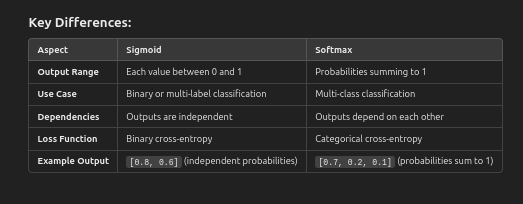

### Training ANN Model

In [ ]:
history_ann = ann_model.fit(X_train.toarray(), y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10


UnimplementedError: Graph execution error:

Detected at node compile_loss/binary_crossentropy/Cast defined at (most recent call last):
  File "/usr/lib/python3.10/runpy.py", line 196, in _run_module_as_main

  File "/usr/lib/python3.10/runpy.py", line 86, in _run_code

  File "/usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py", line 37, in <module>

  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 992, in launch_instance

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelapp.py", line 619, in start

  File "/usr/local/lib/python3.10/dist-packages/tornado/platform/asyncio.py", line 195, in start

  File "/usr/lib/python3.10/asyncio/base_events.py", line 603, in run_forever

  File "/usr/lib/python3.10/asyncio/base_events.py", line 1909, in _run_once

  File "/usr/lib/python3.10/asyncio/events.py", line 80, in _run

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 685, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/tornado/ioloop.py", line 738, in _run_callback

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 825, in inner

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 786, in run

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 361, in process_one

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 261, in dispatch_shell

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/kernelbase.py", line 539, in execute_request

  File "/usr/local/lib/python3.10/dist-packages/tornado/gen.py", line 234, in wrapper

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py", line 302, in do_execute

  File "/usr/local/lib/python3.10/dist-packages/ipykernel/zmqshell.py", line 539, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2975, in run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3030, in _run_cell

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/async_helpers.py", line 78, in _pseudo_sync_runner

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3257, in run_cell_async

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3473, in run_ast_nodes

  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code

  File "<ipython-input-10-08bada317efb>", line 1, in <cell line: 1>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 117, in error_handler

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 320, in fit

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 121, in one_step_on_iterator

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 108, in one_step_on_data

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/trainer.py", line 54, in train_step

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 359, in _compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/trainer.py", line 327, in compute_loss

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 611, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/trainers/compile_utils.py", line 652, in call

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 56, in __call__

  File "/usr/local/lib/python3.10/dist-packages/keras/src/tree/tree_api.py", line 148, in map_structure

  File "/usr/local/lib/python3.10/dist-packages/keras/src/tree/optree_impl.py", line 79, in map_structure

  File "/usr/local/lib/python3.10/dist-packages/optree/ops.py", line 752, in tree_map

  File "/usr/local/lib/python3.10/dist-packages/keras/src/losses/loss.py", line 57, in <lambda>

  File "/usr/local/lib/python3.10/dist-packages/keras/src/ops/core.py", line 822, in convert_to_tensor

  File "/usr/local/lib/python3.10/dist-packages/keras/src/backend/tensorflow/core.py", line 132, in convert_to_tensor

Cast string to float is not supported
	 [[{{node compile_loss/binary_crossentropy/Cast}}]] [Op:__inference_one_step_on_iterator_1488]

### Evaluating the ANN

In [1]:

ann_predictions = ann_model.predict(X_test.toarray()).argmax(axis=1)
print("ANN Classification Report:")
print(classification_report(y_test_encoded, ann_predictions))

NameError: name 'ann_model' is not defined

# CNN

In [ ]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.utils import to_categorical

# Convert labels to one-hot encoding
y_train_categorical = to_categorical(y_train_encoded)
y_test_categorical = to_categorical(y_test_encoded)

# Reshape input for Conv1D (add sequence length dimension)
X_train_cnn = X_train.toarray().reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_cnn = X_test.toarray().reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the CNN model
cnn_model = Sequential([
    Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile the model
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',  # Multi-class classification
                  metrics=['accuracy'])

# Train the model
history_cnn = cnn_model.fit(
    X_train_cnn,
    y_train_categorical,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

# Evaluate the model
cnn_predictions = cnn_model.predict(X_test_cnn).argmax(axis=1)
print("CNN Classification Report:")
print(classification_report(y_test_encoded, cnn_predictions))


# RNN

In [ ]:
from tensorflow.keras.layers import Embedding, SimpleRNN

# Define the RNN model
# Note: Embedding size and input length depend on the vocabulary size of your Questions
rnn_model = Sequential([
    Embedding(input_dim=X_train.shape[1], output_dim=128, input_length=X_train.shape[1]),
    SimpleRNN(128, activation='tanh'),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(len(label_encoder.classes_), activation='softmax')  # Output layer
])

# Compile the model
rnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',  # Multi-class classification
                  metrics=['accuracy'])

# Train the model
history_rnn = rnn_model.fit(
    X_train.toarray(),
    y_train_categorical,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

# Evaluate the model
rnn_predictions = rnn_model.predict(X_test.toarray()).argmax(axis=1)
print("RNN Classification Report:")
print(classification_report(y_test_encoded, rnn_predictions))


# Model Comparison

In [ ]:
from sklearn.metrics import accuracy_score

# Compute accuracy for each model
ann_accuracy = accuracy_score(y_test_encoded, ann_predictions)
cnn_accuracy = accuracy_score(y_test_encoded, cnn_predictions)
rnn_accuracy = accuracy_score(y_test_encoded, rnn_predictions)

print(f"ANN Accuracy: {ann_accuracy}")
print(f"CNN Accuracy: {cnn_accuracy}")
print(f"RNN Accuracy: {rnn_accuracy}")


# CHATBOT

In [ ]:
# Interactive chatbot using the ANN model (as an example)
while True:
    user_input = input("Ask a question (or type 'exit' to quit): ")
    if user_input.lower() == 'exit':
        break

    # Preprocess the input (same preprocessing steps as training)
    user_input_tfidf = vectorizer.transform([user_input]).toarray()

    # Make prediction
    predicted_label = ann_model.predict(user_input_tfidf).argmax(axis=1)
    predicted_answer = label_encoder.inverse_transform(predicted_label)

    print(f"Answer: {predicted_answer[0]}")
